In [14]:
import numpy as np
import cv2
import sklearn
import matplotlib.pyplot as plt
import pickle


In [15]:
def load_data(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f, encoding='bytes')
    return data

In [16]:
data_path = "../data/raw/cifar-10-batches-py/"

dict = load_data(data_path + "data_batch_1")
dict = dict | load_data(data_path + "data_batch_2")
dict = dict | load_data(data_path + "data_batch_3")
dict = dict | load_data(data_path + "data_batch_4")
dict = dict | load_data(data_path + "data_batch_5")
dict.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [17]:
dict_test = load_data(data_path + "test_batch")

In [18]:
def to_image(img_flat):
    img_R = img_flat[0:1024].reshape((32, 32))
    img_G = img_flat[1024:2048].reshape((32, 32))
    img_B = img_flat[2048:3072].reshape((32, 32))
    img = np.dstack((img_R, img_G, img_B))
    return img

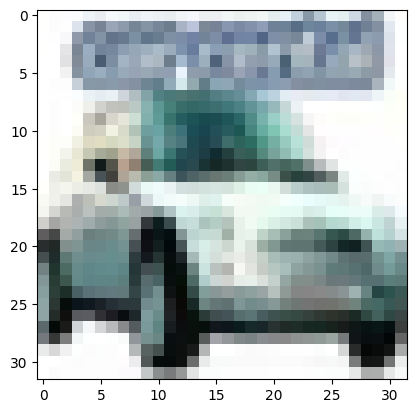

In [25]:
X_train = np.array(dict[b'data']).reshape(-1, 32, 32, 3) / 255.0
y_train = np.array(dict[b'labels'])
X_train = X_train.reshape(X_train.shape[0], -1)
X_train = [to_image(img) for img in X_train]

plt.imshow(X_train[0])

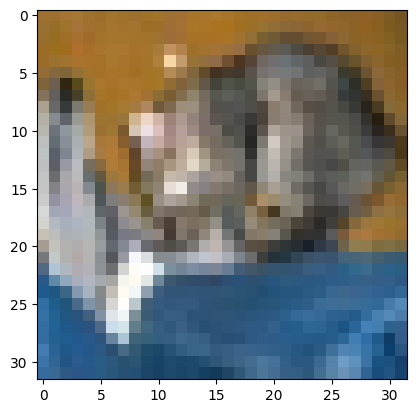

In [26]:
X_test = np.array(dict_test[b'data']).reshape(-1, 32, 32, 3) / 255.0
y_test = np.array(dict_test[b'labels'])
X_test = X_test.reshape(X_test.shape[0], -1)
X_test = [to_image(img) for img in X_test]


plt.imshow(X_test[0])

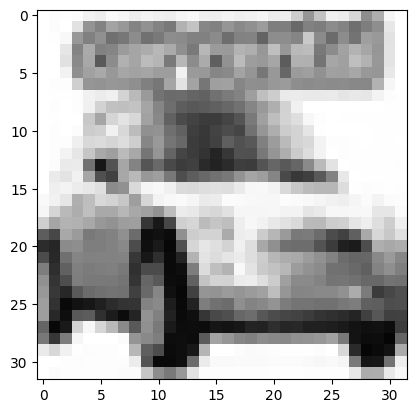

In [27]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray = rgb2gray(X_train[0])    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

Last accuracy values :
- random_forest : acc: 0.47 / cross_val: 0.41
- svm : acc: 0.22 / cross_val: 0.33
- logistic_regression : acc: 0.41 / cross_val: 0.37
- knn : acc: 0.34 / cross_val: 0.29

Last accuracy values on validation data without feature extraction :
- random_forest : acc: 0.48
- svm : acc: 0.41
- logistic_regression : acc: 0.52
- knn : acc: 0.51

Last accuracy values with hog :
- random_forest : acc: 0.14 / cross_val: 0.40
- svm : acc: 0.11 / cross_val: 0.33
- logistic_regression : acc: 0.13 / cross_val: 0.37
- knn : acc: 0.13 / cross_val: 0.29

Last accuracy values with flatten :
- random_forest : acc: 0.42 / cross_val: 0.40
- svm : acc: 0.24 / cross_val: 0.33
- logistic_regression : acc: 0.40 / cross_val: 0.37
- knn : acc: 0.33 / cross_val: 0.29

Last accuracy values with sift :
- random_forest : acc: 0.10 / cross_val: 0.40
- svm : acc: 0.10 / cross_val: 0.33
- logistic_regression : acc: 0.10 / cross_val: 0.37
- knn : acc: 0.10 / cross_val: 0.29

Last accuracy values with vlad :
- random_forest : acc: 0.17 / cross_val: 0.40
- svm : acc: 0.11 / cross_val: 0.33
- logistic_regression : acc: 0.12 / cross_val: 0.37
- knn : acc: 0.21 / cross_val: 0.29

Last accuracy values with grayscale + flatten + PCA :
- random_forest : acc: 0.34 / cross_val: 0.40
- svm : acc: 0.16 / cross_val: 0.33
- logistic_regression : acc: 0.28 / cross_val: 0.37
- knn : acc: 0.30 / cross_val: 0.29

Last accuracy values with contrast + flatten :
- random_forest : acc: 0.14 / cross_val: 0.40
- svm : acc: 0.08 / cross_val: 0.33
- logistic_regression : acc: 0.13 / cross_val: 0.37
- knn : acc: 0.12 / cross_val: 0.29

Last accuracy values with contrast + sift :
- random_forest : acc: 0.10 / cross_val: 0.40
- svm : acc: 0.10 / cross_val: 0.33
- logistic_regression : acc: 0.10 / cross_val: 0.37
- knn : acc: 0.10 / cross_val: 0.29

- Montrer qu'on comprend ce qu'on utilise
- Montrer les images de chaque résultats
- Analyse qualitative des résultats

Classification binaire et multi-classe : https://kobia.fr/classification-metrics-multi-class-simple/#:~:text=Cas%20multi-classe%20%3A%20une%20probabilité,d%27être%20lever%20de%20Soleil

Preprocessing data : https://scikit-learn.org/stable/modules/preprocessing.html

Classifier Comparison : https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

Histogram of Oriented Gradients : https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html

Colormap : https://matplotlib.org/stable/users/explain/colors/colormaps.html

Histogram of Colors : https://datacorner.fr/image-processing-2/

Corner Detection : https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_corner.html#sphx-glr-auto-examples-features-detection-plot-corner-py

Contrast image : 
- Lab color space : https://www.xrite.com/blog/lab-color-space
- code : https://stackoverflow.com/questions/39308030/how-do-i-increase-the-contrast-of-an-image-in-python-opencv

Vlad : https://github.com/tim-hilt/vlad/blob/master/vlad/vlad.py

Exemple de détections de features : https://scikit-image.org/docs/dev/auto_examples/features_detection/index.html

(60, 2) (40, 2) (60,) (40,)
(60,) (60,) (60,)


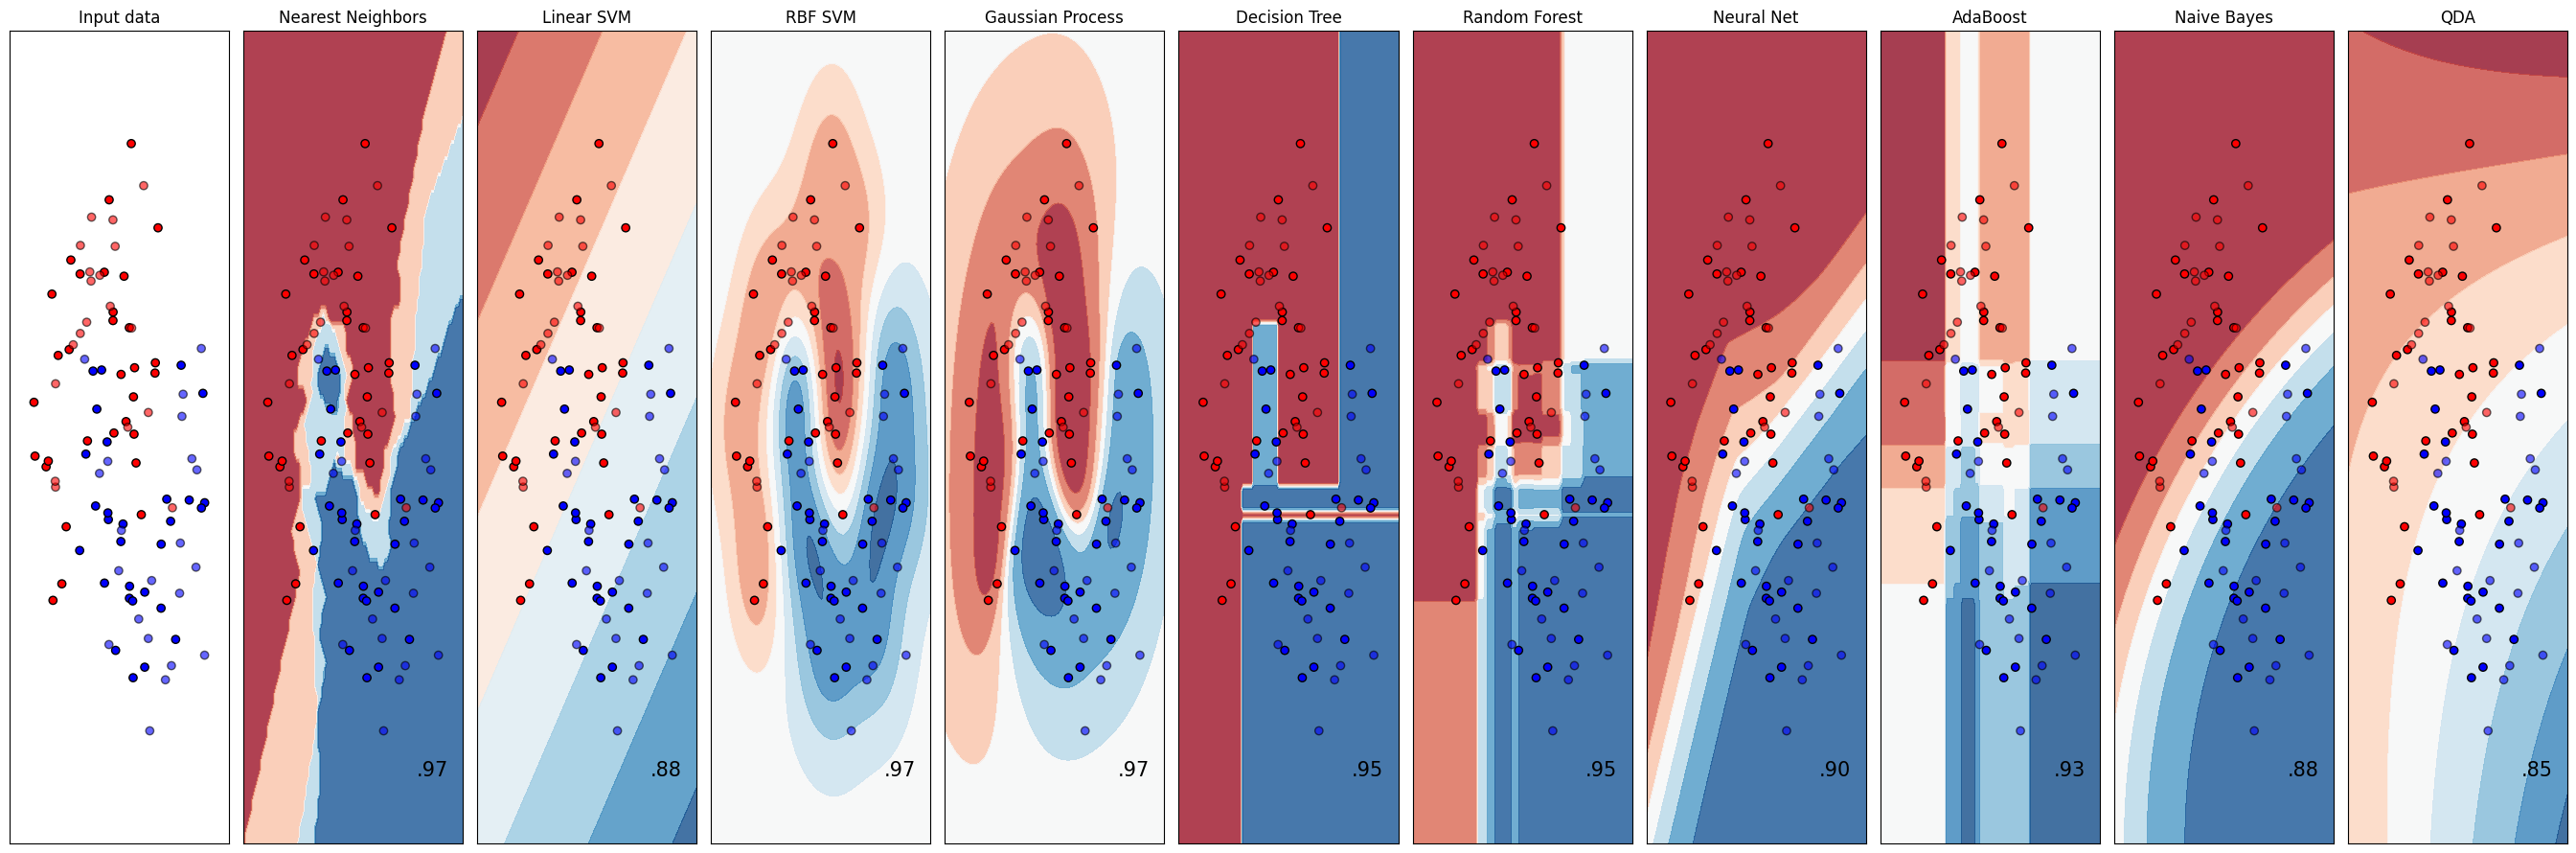

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

datasets = [
    make_moons(noise=0.3, random_state=0),
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()